<a href="https://colab.research.google.com/github/eduardoprospero/IC-ENEM/blob/main/Analise_Exploratoria_Comparativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise Exploratória

Imports necessários

In [ ]:
#Imports
import csv
import pandas as pd
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

np.set_printoptions(suppress=True)

In [ ]:
#Liberar acesso ao drive
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


##Nossas Amostras

Nesse código trabalharemos com as amostras que geramos anteriormente. Essas amostras representam pessoas inscritas no ENEM que não faltaram nenhum dos dias, não são treineiras e tenham feito a prova azul.

###Enem 2019

In [ ]:
#Amostra referente ao ENEM 2019
azulD1 = pd.read_csv("/content/drive/Shareddrives/IC_Edu_Julie/Dados/amostra_D1.csv")
azulD2 = pd.read_csv("/content/drive/Shareddrives/IC_Edu_Julie/Dados/amostra_D2.csv")

azulD1_019 = azulD1.drop(columns=['Unnamed: 0'])
azulD2_019 = azulD2.drop(columns=['Unnamed: 0'])

In [ ]:
azulD1_019.head(2)

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_PROVA,SG_UF_PROVA,...,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,NU_NOTA_REDACAO
0,190001475147,2409332,19.0,M,4,1,1.0,0,2407104,RN,...,DADBBCDBACBDACCEBEAACBECADDBEDACBBEDAADDDECCE,DCEABDAECBADBCADBCDAEBADCEDBACBCCDBAABEDBCBDA,99999EECABDCABEAAACBCDEEDEBBAEACBCAABADEAECCAE...,DEACBEBBCBECDAEEBDDBAECBDBAECBCBABDCEDABCEABC,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,500
1,190001421550,2927408,21.0,M,3,1,1.0,0,2927408,BA,...,BBCACDCBECBDDCABDACEBBDEDEDCBCDEABDCBACECBBEA,AEBCABAACBDCEDEEEAEDCECBEDBCAABCAEDEACBEBAABD,BDABE99999CCBABDDCEEDAAECBAEAEDCCCCCEBEAADBADD...,DCDECBCADBECBCEBADECEDCADDBCAACDEBDCBECBDEEDC,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,500


###Enem 2020 Físico

In [ ]:
#Amostra referente ao ENEM 2020
azulD1 = pd.read_csv("/content/drive/Shareddrives/IC_Edu_Julie/Dados020/amostra_D1.csv")
azulD2 = pd.read_csv("/content/drive/Shareddrives/IC_Edu_Julie/Dados020/amostra_D2.csv")

azulD1_020 = azulD1.drop(columns=['Unnamed: 0'])
azulD2_020 = azulD2.drop(columns=['Unnamed: 0'])

In [ ]:
azulD1_020.head(2)

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_MUNICIPIO_PROVA,TP_PRESENCA_CN,...,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,NU_NOTA_REDACAO
0,200003132410,3,F,3,1,NaN,0,NaN,4305207,1,...,CABBEEACAEBEBCCDACBEDADDCCBECDCBDADDEBDBDACAB,ACEBBDDCADDAACEEAAEBDBDCCDACCDEDCDACADBBBECDD,99999CBECEBEDBEECEABBADCDDADCADAAECDEBAAADEBAD...,BADCAAAEEDBEDBACEDBACCDBABDECCDDCCAEAACEDACCB,1,CEDBDDDCACCBDAEBADCBDCDXAAECEDDDECDDCBDDAEDCC,DABCBDDDAEDBECECBBEDEBDEECBCCCBACDCCADEBDECDD,AAEDCACEEECEAACBAEBBEDACDBAADADDEBBEBAAADEACAA...,AEBCCXCCCACCDABCCABCABCBAECEDBBDBEEEDBBACCDAC,700
1,200006762554,5,F,3,1,NaN,0,NaN,2507507,1,...,DABCDCAEDEDCBEDCDACDDAEBDCEECCDCEECDABDABECAC,ECCAEAEACDDABCBDABEADBABACADABACDDEECBACCDAEC,99999DDCBBABECCACCBBCDACCCAAAADDEAADBBAEECEDEA...,EEDCCEACEBAAAADCDCCABCAEBBEBABDDCCABDEADEDECB,1,CEDBDDDCACCBDAEBADCBDCDXAAECEDDDECDDCBDDAEDCC,DABCBDDDAEDBECECBBEDEBDEECBCCCBACDCCADEBDECDD,AAEDCACEEECEAACBAEBBEDACDBAADADDEBBEBAAADEACAA...,AEBCCXCCCACCDABCCABCABCBAECEDBBDBEEEDBBACCDAC,600


###Enem 2020 Digital

In [ ]:
#Amostra referente ao ENEM 2020 digital
azulD1 = pd.read_csv("/content/drive/Shareddrives/IC_Edu_Julie/Dados020/amostra_D1_d.csv")
azulD2 = pd.read_csv("/content/drive/Shareddrives/IC_Edu_Julie/Dados020/amostra_D2_d.csv")

azulD1_020_digital = azulD1.drop(columns=['Unnamed: 0'])
azulD2_020_digital = azulD2.drop(columns=['Unnamed: 0'])

In [ ]:
azulD1_020_digital.head(2)

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_MUNICIPIO_PROVA,TP_PRESENCA_CN,...,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,NU_NOTA_REDACAO
0,200001334237,4,M,1,1,NaN,0,NaN,3550308,1,...,CECACBBCADACADDEEBDBCBAEEEEBDADABDCEEDDCCDCBC,EAADABBEABCADDBAAEDBCABDABAACAEAEEABECBBADEDB,CADDE99999AEEADBAAABEEECEEDADACBDECABEBEADBCCB...,BABADDBDAEBAEBBBEEDEEECBCEBBDACCEABDCCBADDCCE,0,DEAAECBBCDCBAEBEEBDBCCACECCDACDABDDBADDECBEBA,EAAADBBEDBDACDBCCDEBDBBCBBADCAECDBABDBCBADEDB,CADDE99999DEBBBBBAADBECBEACCBECEDAEABEECBDCCAD...,BABBDABAEEBACBACDEDEEXCACEBBADCBEABADCBADDCCE,600
1,200006293617,10,M,3,1,NaN,0,NaN,5208707,1,...,EEAAECBCCDACAEBAEBDBCCACECBDECDEBDCBAADECDECA,EAAEDABDDBDBADBCCDEBADACBBABCCBCDBABDBCBAEADB,CADDD99999AEBABBBAADBECBEACCCECEDAEDEACCADCCBD...,BABBDABAEEBACBACDEDCEDCACEBBADCBEABADCBADDCCE,0,DEAAECBBCDCBAEBEEBDBCCACECCDACDABDDBADDECBEBA,EAAADBBEDBDACDBCCDEBDBBCBBADCAECDBABDBCBADEDB,CADDE99999DEBBBBBAADBECBEACCBECEDAEABEECBDCCAD...,BABBDABAEEBACBACDEDEEXCACEBBADCBEABADCBADDCCE,740


##Comparações

Aqui faremos uma série de comparações entre as três amostras, como o tamanho respectivo de cada uma, as diferenças entre o número de inscritos do sexo feminino em cada ano, se esse número aumentou ou diminuiu, etc.

####Tamanho

Começaremos análisando o tamanho de cada uma. Lembrando que o ENEM 2019 teve 5095270 inscritos, enquanto o 2020 teve 5783109.

In [ ]:
#Montando o banco de dados no formato ideal para o plot:
df = pd.DataFrame([['2019', 'primeiro dia',len(azulD1_019)],['2020','primeiro dia',len(azulD1_020)],['2020 digital','primeiro dia', len(azulD1_020_digital)],
 ['2019','segundo dia',len(azulD2_019)], ['2020','segundo dia',len(azulD2_020)], ['2020 digital', 'segundo dia',len(azulD2_020_digital)]], 
 columns=['Ano','Dia','Quantidade'])

df

,Ano,Dia,Quantidade
0,2019,primeiro dia,790677
1,2020,primeiro dia,538479
2,2020 digital,primeiro dia,6532
3,2019,segundo dia,790851
4,2020,segundo dia,537485
5,2020 digital,segundo dia,6595


In [ ]:
#Gráfico do Tamanho de Cada Amostra
fig = px.bar(df, x="Dia", y="Quantidade",
             color='Ano', barmode='group',text="Quantidade",
             title='Gráfico do Tamanho de Cada Amostra')
fig.show()

Mesmo 2020 tendo tido mais inscritos do que 2019 seu número liquido foi muito menor, isso se explica pelo ocorrimento da pandemia de corona vírus.

Como isso já era esperado, o INEP fez pela primeira vez a aplicação da prova online, o que nos surpreendeu aqui foi que muito menos pessoas fizeram a opção online do que imaginavamos.

####Sexo

Para comprar o número de pessoas do sexo feminino com o do sexo masculino olharemos apenas para a proporção das do sexo feminino em cada prova.

In [ ]:
#Sexo Feminino
fem_d1_019 = azulD1_019[azulD1_019['TP_SEXO'] == 'F']
fem_d1_020 = azulD1_020[azulD1_020['TP_SEXO'] == 'F']
fem_d1_020_d = azulD1_020_digital[azulD1_020_digital['TP_SEXO'] == 'F']

fem_d2_019 = azulD2_019[azulD2_019['TP_SEXO'] == 'F']
fem_d2_020 = azulD2_020[azulD2_020['TP_SEXO'] == 'F']
fem_d2_020_d = azulD2_020_digital[azulD2_020_digital['TP_SEXO'] == 'F']

In [ ]:
#Montando o banco de dados no formato ideal para o plot:
df = pd.DataFrame([['2019', 'primeiro dia', round(len(fem_d1_019)*100/len(azulD1_019), 2)],
                   ['2020','primeiro dia',round(len(fem_d1_020)*100/len(azulD1_020), 2)],
                   ['2020 digital','primeiro dia',round(len(fem_d1_020_d)*100/len(azulD1_020_digital), 2)],
                   ['2019','segundo dia', round(len(fem_d2_019)*100/len(azulD2_019), 2)], 
                   ['2020','segundo dia',round(len(fem_d2_020)*100/len(azulD2_020), 2)], 
                   ['2020 digital', 'segundo dia', round(len(fem_d2_020_d)*100/len(azulD2_020_digital), 2)]], 
                  columns = ['Ano','Dia','Quantidade'] )
df

,Ano,Dia,Quantidade
0,2019,primeiro dia,58.98
1,2020,primeiro dia,59.81
2,2020 digital,primeiro dia,52.63
3,2019,segundo dia,58.96
4,2020,segundo dia,59.97
5,2020 digital,segundo dia,52.54


In [ ]:
#Gráfico de proporção de mulheres por dia
fig = px.bar(df, x="Dia", y="Quantidade",
             color='Ano', barmode='group',text="Quantidade",
             title='Gráfico de proporção de mulheres por dia')
fig.show()

Em ambos os anos presencial a proporção do sexo feminino se aproximou de 
60%, apenas na versão online que ela tendeu mais para 50%.


####Língua x Tipo de Escola

Aqui vamos ver se existe uma relação entre o tipo de ensino que o aluno teve e a lingua que ele escolheu na prova de linguagens e códigos. 

Vamos desconsiderar os alunos que não não declararam tipo de escola.

Como teremos que fazer essas ações para os três bancos de dados, criamos uma função que recebe o banco de dados e seu respectivo ano e nos retorna um df com três colunas: o ano, o tipo de escola e a lingua escolhida.

In [ ]:
#função
def df_de(df,ano):
  aux_ling = ['TP_LINGUA']
  aux_esc = ['TP_ESCOLA']                  # selecionando as colunas

  ling = df.filter(items = aux_ling)
  esc = df.filter(items = aux_esc)         #filtrando do df original

  #adicionando coluna auxiliar para merge
  esc.insert(0,  "aux", range(0,len(esc)), allow_duplicates=False)
  ling.insert(0,  "aux", range(0,len(esc)), allow_duplicates=False)

  #merge
  df = pd.merge(esc, ling, 
                   how='left', left_on=['aux'],
                   right_on=['aux'])
  filtro  = df['TP_ESCOLA'] > 1           # excluindo quem não declarou tipo de escola.
  filtrado = df[filtro]
  sem_aux= filtrado.drop(columns=['aux'])    # retirando a coluna auxiliar
  sem_aux.insert(0, "ano", ano, allow_duplicates=False)    #inserindo coluna de ano

  return sem_aux

In [ ]:
#2019
de_019 = df_de(azulD1_019, '2019')
de_019.head(3)

,ano,TP_ESCOLA,TP_LINGUA
2,2019,2,1
4,2019,2,1
5,2019,2,0


In [ ]:
#2020 fisico e digital
de_020 = df_de(azulD1_020, '2020')
de_020_d = df_de(azulD1_020_digital, '2020 digital')

In [ ]:
# unindo 2020 fisico com 2020 digital
aux = pd.concat([de_020_d, de_020])
aux.head(3)

,ano,TP_ESCOLA,TP_LINGUA
2,2020 digital,2,0
5,2020 digital,2,1
11,2020 digital,2,1


In [ ]:
# unindo com 2019
tb_compl= pd.concat([aux, de_019])
tb_compl.head(2)

,ano,TP_ESCOLA,TP_LINGUA
2,2020 digital,2,0
5,2020 digital,2,1


In [ ]:
#trocando os números por palavras
# 3 == privada
# 2 == publica

tb_compl.loc[tb_compl['TP_ESCOLA']>2,'TP_ESCOLA']='Privada'

tb_compl.loc[tb_compl['TP_ESCOLA']==2,'TP_ESCOLA']='Publica'

tb_compl.head(3)

,ano,TP_ESCOLA,TP_LINGUA
2,2020 digital,Publica,Ing
5,2020 digital,Publica,Esp
11,2020 digital,Publica,Esp


#####Tabela de Dupla Entrada

In [ ]:
#tabela de dupla entrada composta
my_crosstab = pd.crosstab(tb_compl['TP_LINGUA'], [tb_compl['ano'], tb_compl['TP_ESCOLA']],
            rownames=['Lingua'],
            colnames=['Ano', "Escola"],
            normalize='columns')

my_crosstab

Ano        2019                2020           2020 digital          
Escola  Privada   Publica   Privada   Publica      Privada   Publica
Lingua                                                              
Esp     0.26516  0.503011  0.232495  0.480326     0.188742  0.421754
Ing     0.73484  0.496989  0.767505  0.519674     0.811258  0.578246

Nossos números variam bem pouco, mas temos que o número de alunos tanto de escolas particulares, quanto publicas que escolhem inglês foi aumentando. Sendo o salto de 2019 para 2020 digital o maior.

####Idade

As idades em 2020 estão como faixa etaria, então primeiramente temos que fazer a conversão. Vamos fazer uma função que passe as idades da amostra de 2019 para faixas etárias e já nos devolva elas contadas.

In [ ]:
#Função
def contagem_idade(dfe):
  df = dfe.loc[:,['NU_IDADE']]

  df.loc[df.NU_IDADE < 17.0, 'NU_IDADE'] = 1
  df.loc[df.NU_IDADE == 17,'NU_IDADE'] = 2
  df.loc[df.NU_IDADE == 18,'NU_IDADE'] = 3
  df.loc[df.NU_IDADE == 19,'NU_IDADE'] = 4
  df.loc[df.NU_IDADE == 20,'NU_IDADE'] = 5
  df.loc[df.NU_IDADE == 21,'NU_IDADE'] = 6
  df.loc[df.NU_IDADE == 22,'NU_IDADE'] = 7
  df.loc[df.NU_IDADE == 23,'NU_IDADE'] = 8
  df.loc[df.NU_IDADE == 24,'NU_IDADE'] = 9
  df.loc[df.NU_IDADE == 25,'NU_IDADE'] = 10
  df.loc[((df.NU_IDADE >= 26) & (df.NU_IDADE <= 30)),'NU_IDADE'] = 11
  df.loc[((df.NU_IDADE >= 31) & (df.NU_IDADE <= 35)),'NU_IDADE'] = 12
  df.loc[((df.NU_IDADE >= 36) & (df.NU_IDADE <= 40)),'NU_IDADE'] = 13
  df.loc[((df.NU_IDADE >= 41) & (df.NU_IDADE <= 45)),'NU_IDADE'] = 14
  df.loc[((df.NU_IDADE >= 46) & (df.NU_IDADE <= 50)),'NU_IDADE'] = 15
  df.loc[((df.NU_IDADE >= 51) & (df.NU_IDADE <= 55)),'NU_IDADE'] = 16
  df.loc[((df.NU_IDADE >= 56) & (df.NU_IDADE <= 60)),'NU_IDADE'] = 17
  df.loc[((df.NU_IDADE >= 61) & (df.NU_IDADE <= 65)),'NU_IDADE'] = 18
  df.loc[((df.NU_IDADE >= 66) & (df.NU_IDADE <= 70)),'NU_IDADE'] = 19
  df.loc[df.NU_IDADE > 70,'NU_IDADE'] = 20


  freq = df['NU_IDADE'].value_counts(normalize=True) 
  df2 = pd.DataFrame(freq)
  df2['faixa'] = df2.index 
  df2 = df2.sort_values(by=['faixa'])

  return df2

dados.loc[dados['Ref/MS'].isin(['MS-3.1','MS-3.2', 'MS-3.A']), 'Categoria Docente'] = 'MS-3' 

In [ ]:
#Aplicando a função
idade_D1_019 = contagem_idade(azulD1_019)
idade_D1_019=idade_D1_019.rename(columns={'NU_IDADE': 'ano_2019'})
idade_D2_019 = contagem_idade(azulD2_019)
idade_D2_019=idade_D2_019.rename(columns={'NU_IDADE': 'ano_2019'})

In [ ]:
#pequena função para contagem de 2020 e 2020 digital.
def contagem_simpels(df):
  freq = df['TP_FAIXA_ETARIA'].value_counts(normalize=True) 
  df2 = pd.DataFrame(freq)
  df2['faixa'] = df2.index 
  df2 = df2.sort_values(by=['faixa'])
  return df2

In [ ]:
#Aplicando a função
idade_D1_020 = contagem_simpels(azulD1_020)
idade_D1_020=idade_D1_020.rename(columns={'TP_FAIXA_ETARIA': 'ano_2020'})
idade_D2_020_d = contagem_simpels(azulD2_020_digital)
idade_D2_020_d=idade_D2_020_d.rename(columns={'TP_FAIXA_ETARIA': 'ano_2020'})


In [ ]:
idade_D1_020.head(2)

,ano_2020,faixa
1,0.007454,1
2,0.178029,2


In [ ]:
#primeiro dia
df = pd.merge(idade_D1_020, idade_D1_019, how = 'inner', on = 'faixa')
df.head(2)

,ano_2020,faixa,ano_2019
0,0.007454,1,0.009925
1,0.178029,2,0.181825


In [ ]:
#negativando os valores de 2019
#para nossa piramide
df['ano_2019'] = -df['ano_2019']
df.head(2)

,ano_2020,faixa,ano_2019
0,0.007454,1,-0.009925
1,0.178029,2,-0.181825


In [ ]:
#segundo dia
df2 = pd.merge(idade_D2_020_d, idade_D2_019, how = 'inner', on = 'faixa')
df2.head(2)

,ano_2020,faixa,ano_2019
0,0.004246,1,0.010091
1,0.154208,2,0.181801


In [ ]:
#negativando os valores de 2019
#para nossa piramide
df2['ano_2019'] = -df2['ano_2019']
df2.head(2)

,ano_2020,faixa,ano_2019
0,0.004246,1,-0.010091
1,0.154208,2,-0.181801


######Piramide Etaria


In [ ]:
import plotly.graph_objects as gp

In [ ]:
# Creating instance of the figure
fig = gp.Figure()

# Adding Male data to the figure
fig.add_trace(gp.Bar(y= df['faixa'], x = df['ano_2019'],
					name = '2019',
					orientation = 'h'))

# Adding Female data to the figure
fig.add_trace(gp.Bar(y = df['faixa'], x = df['ano_2020'],
					name = '2020', orientation = 'h'))

# Updating the layout for our graph
fig.update_layout(title = 'Piramide Etaria Primeiro Dia: Distribuição por Ano',
				title_font_size = 22, barmode = 'relative',
				bargap = 0.0, bargroupgap = 0,
				yaxis = dict(tickvals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
								
							ticktext = ['-17', '17', '18', '19','20', '21','22', '23', '24', '25', '26-30', '31-35', '36-40', '41-45','46-50','51-55','56-60','61-65','66-70','71+'],
								
							title = 'Idade',
							title_font_size = 14)
				)

fig.show()


In [ ]:
# Creating instance of the figure
fig = gp.Figure()

# Adding Male data to the figure
fig.add_trace(gp.Bar(y= df2['faixa'], x = df2['ano_2019'],
					name = '2019',
					orientation = 'h'))

# Adding Female data to the figure
fig.add_trace(gp.Bar(y = df2['faixa'], x = df2['ano_2020'],
					name = '2020 digital', orientation = 'h'))

# Updating the layout for our graph
fig.update_layout(title = 'Piramide Etaria Segundo Dia: Distribuição por Ano',
				title_font_size = 22, barmode = 'relative',
				bargap = 0.0, bargroupgap = 0,
				yaxis = dict(tickvals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
								
							ticktext = ['-17', '17', '18', '19','20', '21','22', '23', '24', '25', '26-30', '31-35', '36-40', '41-45','46-50','51-55','56-60','61-65','66-70','71+'],
								
							title = 'Idade',
							title_font_size = 14)
				)

fig.show()

É muito interessante notar que de 2019 para 2020 as proporções na prova presencial são praticamente as mesmas, só é possivel ver diferença entre 2019 e 2020 digital.

###Notas por Municípios

#####Codigo dos municipios

In [ ]:
#Importando a posiçao geografica dos municipios pra fazer o grafico de mapa
with open('/content/drive/Shareddrives/IC_Edu_Julie/Dados/municipios.csv.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",") for line in stripped if line)
    with open('mun.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerows(lines)

In [ ]:
#Lendo o dataset e importando os codigos de municipio
municipios= pd.read_csv('mun.csv')
municipios["codigo_ibge"] = pd.to_numeric(municipios["codigo_ibge"])

#####Função

In [ ]:
def juntando(df, dia):
  df['CO_MUNICIPIO_PROVA']=pd.to_numeric(df['CO_MUNICIPIO_PROVA'])

  aux = pd.merge(df, municipios, 
                   how='left', left_on=['CO_MUNICIPIO_PROVA'],
                   right_on=['codigo_ibge'])
  if dia=='1':
    aux["NU_NOTA_LC"] = pd.to_numeric(aux["NU_NOTA_LC"])
    aux["NU_NOTA_CH"] = pd.to_numeric(aux["NU_NOTA_CH"])
    return aux
  if dia =='2':  
    aux["NU_NOTA_CN"] = pd.to_numeric(aux["NU_NOTA_CN"])
    aux["NU_NOTA_MT"] = pd.to_numeric(aux["NU_NOTA_MT"])
    return aux

#####Dataframes

In [ ]:
df_d1_19 = juntando(azulD1_019, '1')
df_d2_19 = juntando(azulD2_019, '2')

In [ ]:
df_d1_20 = juntando(azulD1_020, '1')
df_d2_20 = juntando(azulD2_020, '2')

In [ ]:
df_d1_20_d = juntando(azulD1_020_digital, '1')
df_d2_20_d = juntando(azulD2_020_digital, '2')

#####Gráfico

######Linguagens e Códigos

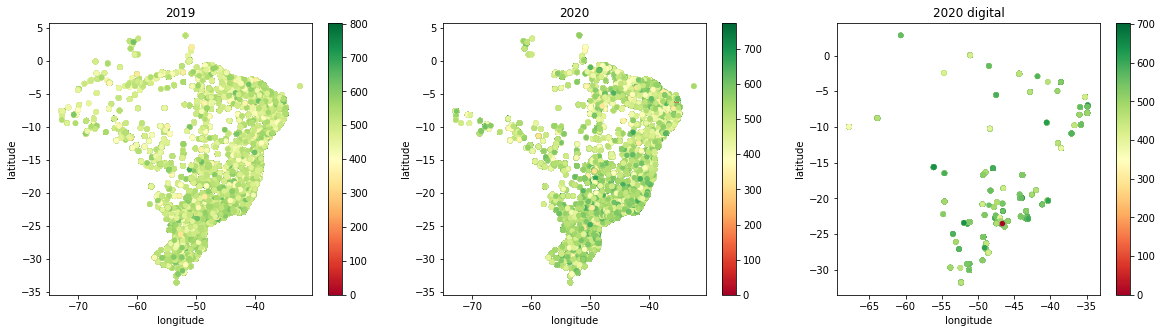

In [ ]:
#Grafico de desempenho no mapa brasileiro
fig, ax= plt.subplots(1,3, figsize=(20,5))

df_d1_19.plot.scatter(y='latitude',x='longitude', 
                      c=df_d1_19['NU_NOTA_LC'], 
                      cmap='RdYlGn',
                      title='2019', ax=ax[0])

df_d1_20.plot.scatter(y='latitude',x='longitude', 
                      c=df_d1_20['NU_NOTA_LC'], 
                      cmap='RdYlGn',
                      title='2020', ax=ax[1])

df_d1_20_d.plot.scatter(y='latitude',x='longitude', 
                      c=df_d1_20_d['NU_NOTA_LC'], 
                      cmap='RdYlGn',
                       title='2020 digital', ax=ax[2])

######Ciências Humanas

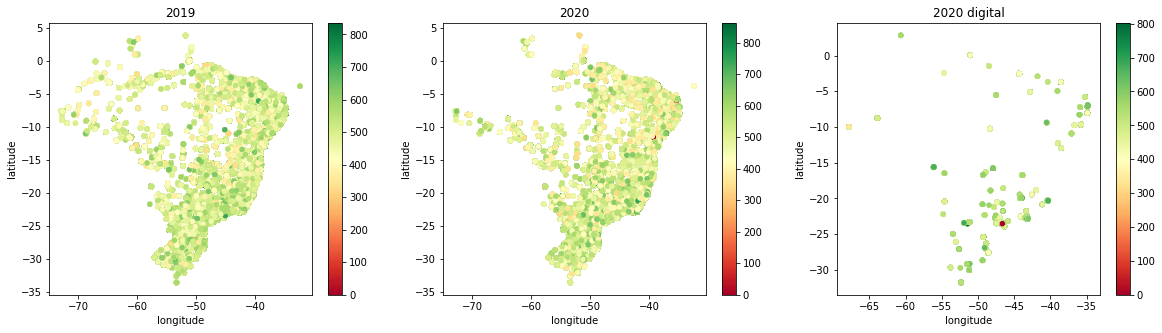

In [ ]:
#Grafico de desempenho no mapa brasileiro
fig, ax= plt.subplots(1,3, figsize=(20,5))

df_d1_19.plot.scatter(y='latitude',x='longitude', 
                      c=df_d1_19['NU_NOTA_CH'], 
                      cmap='RdYlGn',
                      title='2019', ax=ax[0])

df_d1_20.plot.scatter(y='latitude',x='longitude', 
                      c=df_d1_20['NU_NOTA_CH'], 
                      cmap='RdYlGn',
                      title='2020', ax=ax[1])

df_d1_20_d.plot.scatter(y='latitude',x='longitude', 
                      c=df_d1_20_d['NU_NOTA_CH'], 
                      cmap='RdYlGn',
                       title='2020 digital', ax=ax[2])

######Ciencias da Natureza

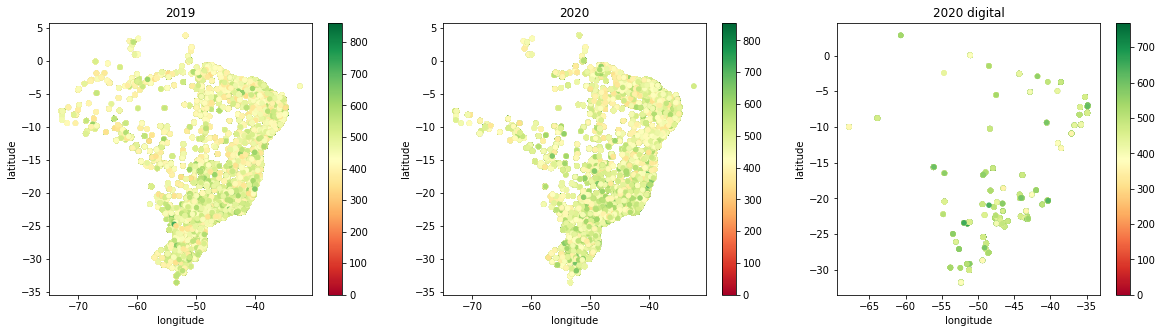

In [ ]:
#Grafico de desempenho no mapa brasileiro
fig, ax= plt.subplots(1,3, figsize=(20,5))

df_d2_19.plot.scatter(y='latitude',x='longitude', 
                      c=df_d2_19['NU_NOTA_CN'], 
                      cmap='RdYlGn',
                      title='2019', ax=ax[0])

df_d2_20.plot.scatter(y='latitude',x='longitude', 
                      c=df_d2_20['NU_NOTA_CN'], 
                      cmap='RdYlGn',
                      title='2020', ax=ax[1])

df_d2_20_d.plot.scatter(y='latitude',x='longitude', 
                      c=df_d2_20_d['NU_NOTA_CN'], 
                      cmap='RdYlGn',
                       title='2020 digital', ax=ax[2])

######Matemática

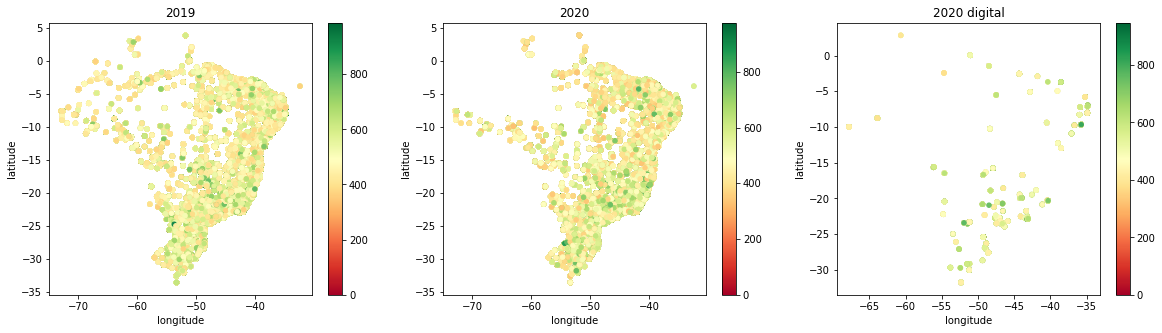

In [ ]:
#Grafico de desempenho no mapa brasileiro
fig, ax= plt.subplots(1,3, figsize=(20,5))

df_d2_19.plot.scatter(y='latitude',x='longitude', 
                      c=df_d2_19['NU_NOTA_MT'], 
                      cmap='RdYlGn',
                      title='2019', ax=ax[0])

df_d2_20.plot.scatter(y='latitude',x='longitude', 
                      c=df_d2_20['NU_NOTA_MT'], 
                      cmap='RdYlGn',
                      title='2020', ax=ax[1])

df_d2_20_d.plot.scatter(y='latitude',x='longitude', 
                      c=df_d2_20_d['NU_NOTA_MT'], 
                      cmap='RdYlGn',
                       title='2020 digital', ax=ax[2])

###Notas por Estado

###Alunos por Estado

Após ter visto a diminuição de regiões no mapa de notas por municipio ficamos curiosos sobre a quantidade de alunos por estado e fomos investigar.

Começamos com uma pequena funçao que nos da a quantidade de alunos por estado.

In [ ]:
def contagem(df, ano):
  freq = df['SG_UF_PROVA'].value_counts() 
  df = pd.DataFrame(freq)
  df['uf'] = df.index
  df = df.rename(columns={'SG_UF_PROVA': ano })

  return df

In [ ]:
estado_d1_19 = contagem(azulD1_019, 'ano_2019')
estado_d1_20 = contagem(azulD1_020, 'ano_2020')
estado_d1_20_d = contagem(azulD1_020_digital, 'ano_2020_d')

In [ ]:
estado_d2_19 = contagem(azulD2_019, 'ano_2019')
estado_d2_20 = contagem(azulD2_020, 'ano_2020')
estado_d2_20_d = contagem(azulD2_020_digital, 'ano_2020_d')

In [ ]:
aux = pd.merge(estado_d1_19, estado_d1_20, how = 'inner', on = 'uf')
df_est_d1 = pd.merge(aux, estado_d1_20_d, how = 'inner', on = 'uf')


In [ ]:
aux2 = pd.merge(estado_d2_19, estado_d2_20, how = 'inner', on = 'uf')
df_est_d2 = pd.merge(aux2, estado_d2_20_d, how = 'inner', on = 'uf')

In [ ]:
df_est_d1['regiao'] = 'NaN'
sul = ['PR', 'SC', 'RS']
norte = ['AC', 'AM', 'RR', 'AP', 'PA', 'RO']
nordeste = ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']
centro_oeste= ['MT', 'GO', 'MS', 'DF']
sudeste = ['MG', 'ES', 'RJ', 'SP']


In [ ]:
for i in range(0, len(df_est_d1['uf'])):
  if df_est_d1['uf'][i] in sul:
    df_est_d1['regiao'][i] = df_est_d1['regiao'][i].replace('NaN', 'sul')
  elif df_est_d1['uf'][i] in norte:
    df_est_d1['regiao'][i] = df_est_d1['regiao'][i].replace('NaN', 'norte')
  elif df_est_d1['uf'][i] in nordeste:
    df_est_d1['regiao'][i] = df_est_d1['regiao'][i].replace('NaN', 'nordeste')
  elif df_est_d1['uf'][i] in sudeste:
    df_est_d1['regiao'][i] = df_est_d1['regiao'][i].replace('NaN', 'sudeste')
  else:
    df_est_d1['regiao'][i] = df_est_d1['regiao'][i].replace('NaN', 'centro-oeste')    


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: Set

In [ ]:
df_est_d1  = df_est_d1 .sort_values(by=['regiao'])
df_est_d1.head(2)

,ano_2019,uf,ano_2020,ano_2020_d,regiao
23,6750,TO,4914,43,centro-oeste
20,10361,MS,6803,114,centro-oeste


######Grafico

https://plotly.com/python/subplots/

In [ ]:
def tracos(ano, reg):
  aux = df_est_d1[df_est_d1['regiao'] ==reg]

  trace = go.Bar(
      x=aux['uf'],
      y=aux[ano],
      name= reg)

  return trace

In [ ]:
from numpy.ma.core import trace
import plotly.graph_objs as go
from plotly import tools



fig = tools.make_subplots(rows=3, cols=1, shared_xaxes=True, 
    subplot_titles=("2019", "2020", "2020 digital"))

#2019
fig.append_trace(tracos('ano_2019','centro-oeste'), 1,1)
fig.append_trace( tracos('ano_2019','nordeste'), 1, 1)
fig.append_trace(tracos('ano_2019','norte'),1,1)
fig.append_trace(tracos('ano_2019','sudeste'),1,1)
fig.append_trace(tracos('ano_2019','sul'),1,1)

#2020
fig.append_trace(tracos('ano_2020','centro-oeste'),  2,1)
fig.append_trace( tracos('ano_2020','nordeste'), 2, 1)
fig.append_trace(tracos('ano_2020','norte'),2,1)
fig.append_trace(tracos('ano_2020','sudeste'),2,1)
fig.append_trace(tracos('ano_2020','sul'),2,1)

#2020 digital
fig.append_trace(tracos('ano_2020_d','centro-oeste'), 3,1)
fig.append_trace( tracos('ano_2020_d','nordeste'), 3, 1)
fig.append_trace(tracos('ano_2020_d','norte'),3,1)
fig.append_trace(tracos('ano_2020_d','sudeste'),3,1)
fig.append_trace(tracos('ano_2020_d','sul'),3,1)

fig['layout'].update(height=800, width=800 , showlegend=False, title_text="Quantidade de Provas Aplicadas por Estado")
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



eu queria um tipo esse https://paulovasconcellos.com.br/como-criar-gráficos-interativos-utilizando-plotly-e-python-3eb6eda57a2b

##Reaplicações

Aqui vamos fazer uma comparação entre o número de pesssoas que precisaram da reaplicação da prova em 2019 vs 2020. 

A reaplicação pode ser solicitada por motivos de problemas logísticos e situações relacionadas à saúde.

Usaremos o bando de dados interio ao invéz da amostra, pois nossa amostra ja esta filtrada para excluir reaplicações.

###2019

In [ ]:
#Selecionando índices que usaremos
columns=['NU_INSCRICAO',                                                       
       'CO_PROVA_CN', 'CO_PROVA_LC', 'CO_PROVA_CH', 'CO_PROVA_MT']  

In [ ]:
#Chamando o banco de dados novamente, agora apenas com os indices desejados
with zipfile.ZipFile('/content/drive/Shareddrives/IC_Edu_Julie/Dados/microdados_enem_2019.zip') as z:
    with z.open('DADOS/MICRODADOS_ENEM_2019.csv') as f:
        df = pd.read_csv(f,sep=';',encoding='ISO-8859-1', usecols=columns, dtype=str)

In [ ]:
re_d2_19 = len(df[df['CO_PROVA_MT'] == '557'])
re_d1_19 = len(df[df['CO_PROVA_LC'] == '551'])

###2020

In [ ]:
#Selecionando índices que usaremos
columns=['NU_INSCRICAO',                                                     
       'CO_PROVA_CN', 'CO_PROVA_LC', 'CO_PROVA_CH', 'CO_PROVA_MT']                                                          
len(columns)

5

In [ ]:
#Chamando o banco de dados novamente, agora apenas com os indices desejados
with zipfile.ZipFile('/content/drive/Shareddrives/IC_Edu_Julie/Dados020/microdados_enem_2020.zip') as z:
    with z.open('DADOS/MICRODADOS_ENEM_2020.csv') as f:
        df = pd.read_csv(f,sep=';',encoding='ISO-8859-1', usecols=columns, dtype=str)

In [ ]:
re_d1_20 = len(df[df['CO_PROVA_LC'] == '657'])
re_d2_20 = len(df[df['CO_PROVA_MT'] == '667'])

###2020 digital

In [ ]:
re_d1_20_d = len(df[df['CO_PROVA_LC'] == '691'])
re_d2_20_d = len(df[df['CO_PROVA_MT'] == '695'])

###Comparação

In [ ]:
df = pd.DataFrame([['2019', 'primeiro dia',re_d1_19],['2020','primeiro dia',re_d1_20],['2020 digital','primeiro dia',re_d1_20_d],
 ['2019','segundo dia',re_d2_19], ['2020','segundo dia',re_d2_20], ['2020 digital', 'segundo dia',re_d2_20_d]], columns=['ano','dia','valor'])
df

,ano,dia,valor
0,2019,primeiro dia,22
1,2020,primeiro dia,15316
2,2020 digital,primeiro dia,7237
3,2019,segundo dia,6
4,2020,segundo dia,15643
5,2020 digital,segundo dia,6645


In [ ]:

fig = px.bar(df, x="dia", y="valor",
             color='ano', barmode='group',text="valor",
             title='Gráfico do número de indivíduos que fizeram a reaplicação da prova')
fig.show()

quando solicitada a reaplicaçao pode mudar de fisica pra digital?

#Analisar faltas